In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from sklearn.manifold import TSNE

# Part 1: Using neural networks to classify handwritten digits
We have used several different models to classify handwritten digits. My best model so far has been KNN (using 3 neighbors) for an accuracy of 0.970 on the test set. My next best model was a random forest for an accuracy of 0.965 on the test set. While these scores are very good, let's see if we can do any better using multilayer perceptron models.
 1. Download the MNIST handwritten digit dataset and make a train-test split (with test_size=0.3).
 2. Define at least six different model architectures (i.e., variations of numbers of hidden layers and number of nodes in each layer) to test.
 3. For each of your models, train the model and report the accuracy score on both the training and test sets.
 4. Which architecture performed the best? Did anything surprise you about who the models performed?
 
Here is the dataset:

### 1, 2, & 3

In [4]:
mnist = fetch_openml('mnist_784', return_X_y=False)
X, y = mnist['data'], mnist['target']
y = y.astype(int)



X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

### 3

In [5]:

architectures = [
    (25,),          
    (100, 25),      
    (500,),         
    (500, 50),      
    (100, 50, 25), 
    (500, 50, 25)  
]

best_test_accuracy = 0.0
best_architecture = None

for arch in architectures:
    model = MLPClassifier(
        hidden_layer_sizes=arch,
        max_iter=2000,
        random_state=42
    )
    model.fit(X_train, y_train)

    train_acc = model.score(X_train, y_train)
    test_acc  = model.score(X_test, y_test)

    print(f"Architecture {arch}:"
          f"  train acc = {train_acc:},"
          f"  test acc = {test_acc:}")


    if test_acc > best_test_accuracy:
        best_test_accuracy = test_acc
        best_architecture = arch


print("\nBest architecture:", best_architecture, "with test accuracy =", best_test_accuracy)


Architecture (25,):  train acc = 0.9999591836734694,  test acc = 0.9508095238095238
Architecture (100, 25):  train acc = 1.0,  test acc = 0.9711428571428572
Architecture (500,):  train acc = 1.0,  test acc = 0.977047619047619
Architecture (500, 50):  train acc = 1.0,  test acc = 0.977047619047619
Architecture (100, 50, 25):  train acc = 1.0,  test acc = 0.9731428571428572
Architecture (500, 50, 25):  train acc = 0.9966122448979592,  test acc = 0.9696666666666667

Best architecture: (500,) with test accuracy = 0.977047619047619


### 4
The single layer with 500 neurons performed the best, with a test accuracy of 97.7%. It’s a bit surprising that adding more layers like 500→50 or 100→50→25, didn’t improve the results, although the results were still within the same percent. This suggests that, for MNIST, a wide single-layer network can understand the necessary information and that extra depth does not drastically improve accuracy. 

# Part 2: Clustering handwritten digits
In this part, you will apply KMeans, DBSCAN, and Agglomerative Clustering to your test set from Part 1. This will reduce the amount of memory and time needed.
  1. Scale your test set, X_test.
  2. Use PCA to reduce X_test to something like 30 dimensions.
  3. Apply KMeans, DBSCAN, and Agglomerative Clustering to your dimension-reduced data.
  4. Create two visual comparisons of the clustering algorithms (as well as the clusters defined by digit labels). Use the first two principal components for one visualization and use t-SNE for the other visualization.

In [7]:
mnist = fetch_openml('mnist_784', return_X_y=False)
X, y = mnist['data'], mnist['target']
y = y.astype(int)


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

In [13]:
#1
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

#2
pca30 = PCA(n_components=30, random_state=42)
X_test_pca30 = pca30.fit_transform(X_test_scaled)

#3
kmeans = KMeans(n_clusters=10, random_state=440)
dbscan = DBSCAN(eps=3, min_samples=5)
agglo = AgglomerativeClustering(n_clusters=10)

k_labels = kmeans.fit_predict(X_test_pca30)
d_labels = dbscan.fit_predict(X_test_pca30)
a_labels = agglo.fit_predict(X_test_pca30)
true_labels = y_test



df_plot = pd.DataFrame(X_test_pca30[:, :2], columns=['PC1', 'PC2'])
df_plot['True'] = true_labels
df_plot['KMeans'] = k_labels
df_plot['DBSCAN'] = d_labels
df_plot['Agglomerative'] = a_labels


In [14]:
df_plot

,PC1,PC2,True,KMeans,DBSCAN,Agglomerative
0,0.785824,14.655316,5.0,6,-1,2
1,3.771213,-5.738254,NaN,5,-1,5
2,5.881693,-3.507175,4.0,8,-1,1
3,10.772721,-7.345897,NaN,8,-1,1
4,-2.753150,0.546425,9.0,7,-1,9
...,...,...,...,...,...,...
20995,0.609756,2.762752,4.0,7,-1,0
20996,4.057717,3.823736,NaN,0,-1,2
20997,-7.583692,-1.002415,9.0,2,-1,6
20998,-2.089350,-7.083517,NaN,4,-1,4


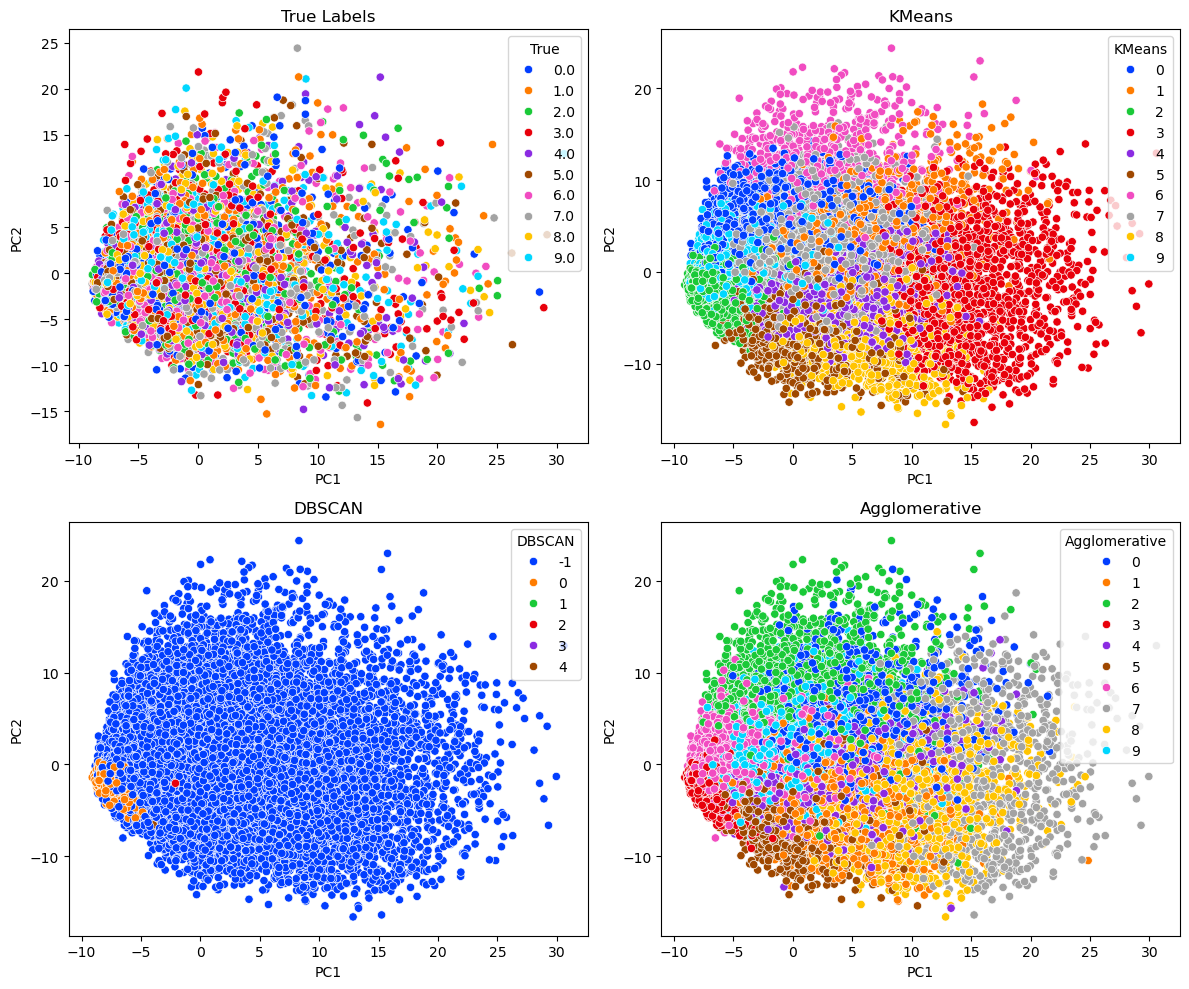

In [15]:
#4
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
titles = ['True Labels', 'KMeans', 'DBSCAN', 'Agglomerative']
cols   = ['True', 'KMeans', 'DBSCAN', 'Agglomerative']

for ax, col, title in zip(axes.flatten(), cols, titles):
    sns.scatterplot(x='PC1', y='PC2', data=df_plot, hue=col,
                    palette='bright', legend='full', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')

plt.tight_layout()
plt.show()

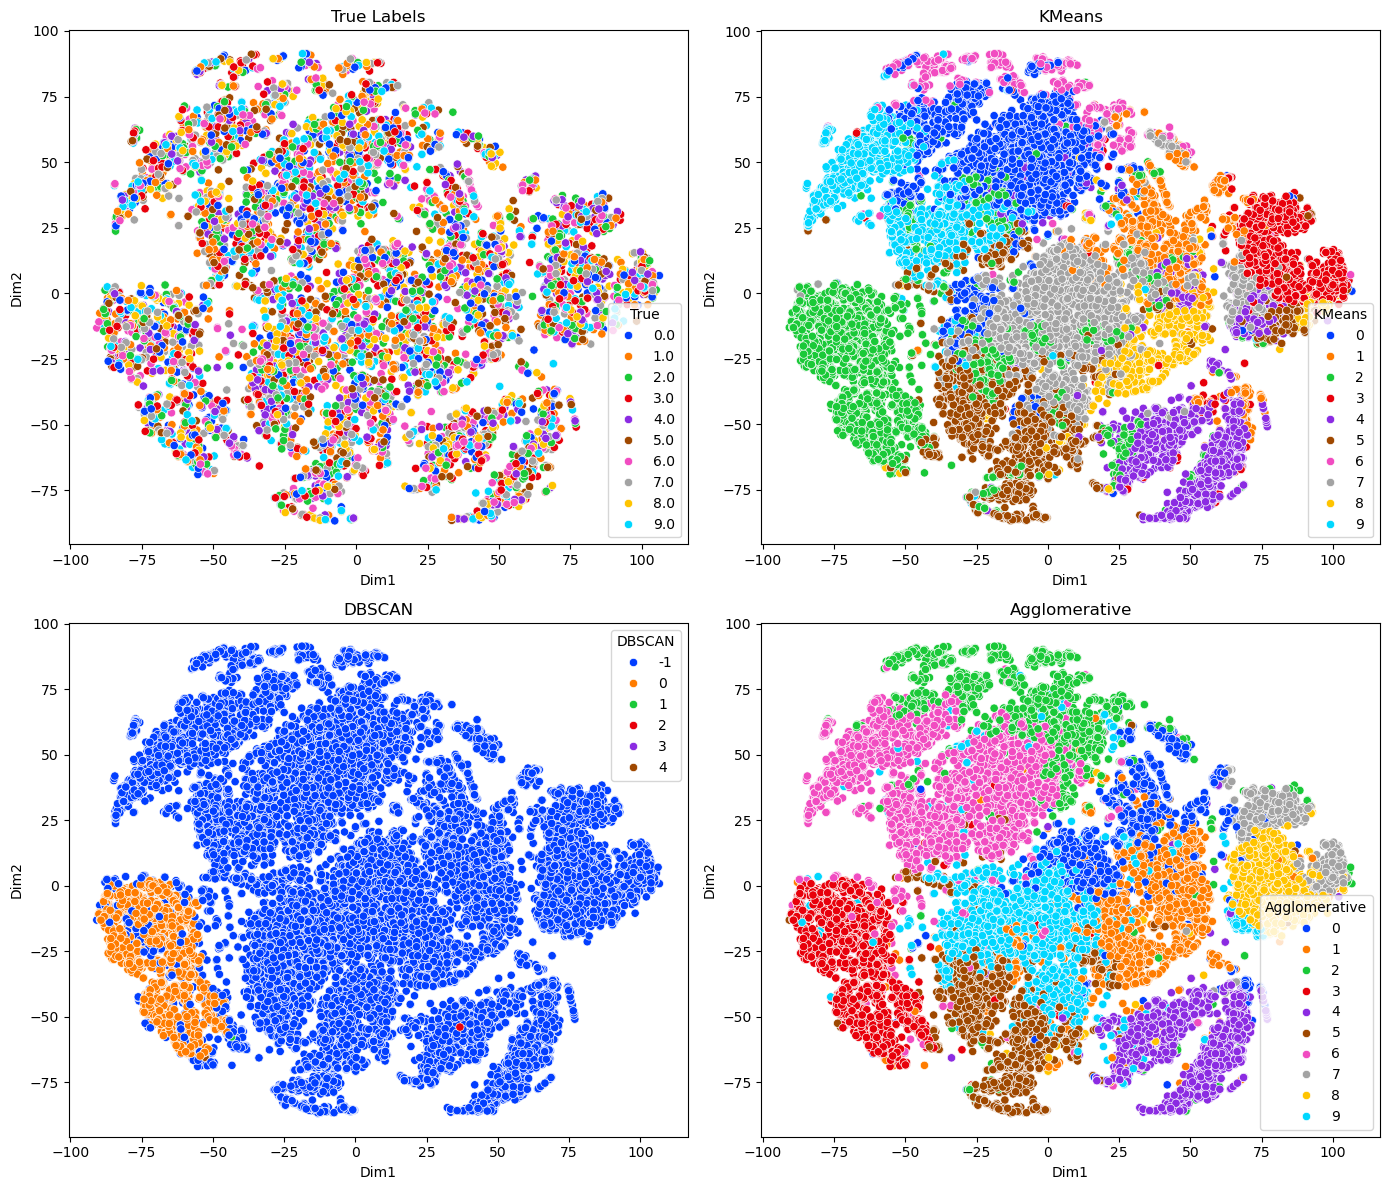

In [12]:
tsne = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne.fit_transform(X_test_scaled)

tsne_df = pd.DataFrame(X_test_tsne, columns=['Dim1', 'Dim2'])
tsne_df['True'] = true_labels
tsne_df['KMeans'] = k_labels
tsne_df['DBSCAN'] = d_labels
tsne_df['Agglomerative'] = a_labels



fig, axes = plt.subplots(2, 2, figsize=(14, 12))
sns.scatterplot(x='Dim1', y='Dim2', data=tsne_df, hue='True', palette='bright', ax=axes[0,0]).set_title('True Labels')
sns.scatterplot(x='Dim1', y='Dim2', data=tsne_df, hue='KMeans', palette='bright', ax=axes[0,1]).set_title('KMeans')
sns.scatterplot(x='Dim1', y='Dim2', data=tsne_df, hue='DBSCAN', palette='bright', ax=axes[1,0]).set_title('DBSCAN')
sns.scatterplot(x='Dim1', y='Dim2', data=tsne_df, hue='Agglomerative', palette='bright', ax=axes[1,1]).set_title('Agglomerative')
plt.tight_layout()
plt.show()
